**# Using cvxpy to solve the Sparse PCA (SPCA) problem given a correlation matrix R.**

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Construct a 10-by-20 Gaussian random matrix and form a 20-by-20 correlation matrix R
X0 = np.random.randn(10, 20)
R = X0.T @ X0

d = 20
e = np.ones(d)

# Small lambda will give dense PCA
lambda_val = 5
k = 10

In [3]:
# Define and solve the CVXPY problem
X = cp.Variable((d, d), symmetric=True)
objective = cp.Minimize(-cp.trace(R @ X) + lambda_val * cp.sum(cp.abs(X)))
constraints = [cp.trace(X) == 1, X >> 0]
prob = cp.Problem(objective, constraints)
prob.solve()

-23.970986078411826

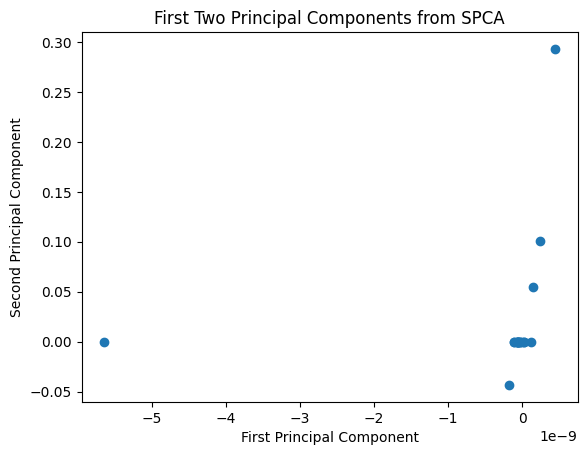

In [4]:
# Show the first two principal components
plt.scatter(X.value[:, 0], X.value[:, 1], marker='o')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components from SPCA')
plt.show()